In [5]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)


In [2]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls


array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

In [3]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial


array([15, 10,  5, ...,  9, 10, 10])

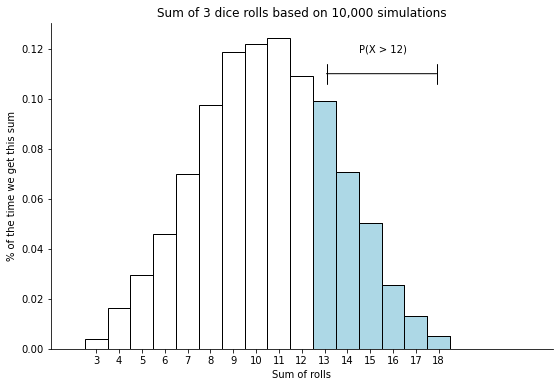

In [4]:
viz.simulation_example1(sums_by_trial)


In [5]:
wins = sums_by_trial > 12
wins


array([ True, False, False, ..., False, False, False])

In [6]:
win_rate = wins.astype(int).mean()
win_rate


0.2633

In [7]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit


-1.0505000000000004

In [8]:
wins = sums_by_trial >= 12
win_rate = wins.astype(int).mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit


0.5860000000000003

In [9]:
p_nap = .3
ndays = ncols = 2
n_simulated_weekends = nrows = 10**5


In [10]:
data = np.random.random((nrows, ncols))
data


array([[0.46762045, 0.70078355],
       [0.18897809, 0.54312897],
       [0.253291  , 0.43836437],
       ...,
       [0.15008559, 0.37577491],
       [0.34690321, 0.58934311],
       [0.97135998, 0.57219933]])

In [11]:
naps = data < p_nap
naps


array([[False, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False, False],
       [False, False]])

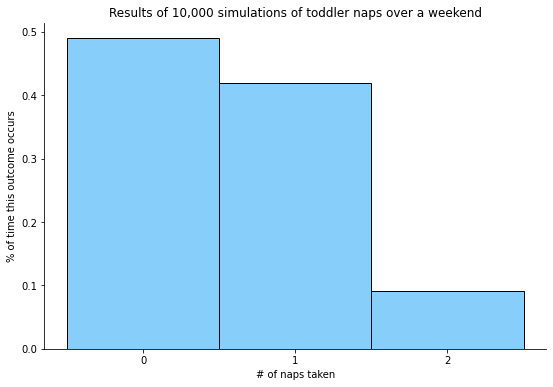

In [12]:
viz.simulation_example2(naps)


In [13]:
(naps.sum(axis=1) >= 1).mean()


0.50998

In [14]:
(naps.sum(axis=1) == 0).mean()


0.49002

In [15]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())


0.42324

In [21]:
# How likely is it that you roll doubles when rolling two dice?
dice_face = [1,2,3,4,5,6]

n_simulations = 10_000
n_trials = 2

dice_roll = np.random.choice(dice_face, (n_simulations, n_trials))
dice_roll

array([[1, 2],
       [5, 6],
       [2, 2],
       ...,
       [6, 1],
       [3, 3],
       [3, 3]])

In [45]:
dice_roll[0,0]

1

In [73]:
dice_roll[...,1]

array([2, 6, 2, ..., 1, 3, 3])

In [74]:
count_match=[]
def dice_suck(dice_roll):
    if dice_roll[...,0] ==dice_roll[...,1]:
        count_even = count_match+1
    return count_match

dice_suck(dice_roll)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [148]:
n_trials = 10000
n_dice = 2
dice_rolls='1','2','3','4','5','6'
rolls = np.random.choice(dice_rolls, (n_trials , n_dice)).reshape(n_trials,n_dice)
rolls = pd.DataFrame(rolls)
same=rolls[rolls[0] == rolls[1]]
same.mean

#len(same)/n_trials

0    inf
1    inf
dtype: float64

In [149]:
# If you flip 8 coins, what is the probability of getting exactly 3 heads? 
n_trials = 10000
n_coin = 8
coin_sides=1,2
flips = np.random.choice(coin_sides, (n_trials , n_coin)).reshape(n_trials,n_coin)
flips = pd.DataFrame(flips)

flips.sum(axis=1)

(flips.sum(axis=1) > 11).mean()



0.6442

In [116]:
# What is the probability of getting more than 3 heads?

(flips.sum(axis=1) >= 13).mean()

0.373

In [138]:
# There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. 
# Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that 
# the two billboards I drive past both have data science students on them?
#1/4 or 25% 

n_trials = 10000
n_coin = 1
coin_sides='wd','wd', 'wd', 'ds'
flips = np.random.choice(coin_sides, (n_trials , n_coin)).reshape(n_trials,n_coin)
flips = pd.DataFrame(flips)



flips
head_count = (flips == 'ds').sum()


head_count/n_trials


0    0.2495
dtype: float64

In [141]:
# Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 
# a day from the snack vending machine. If on monday the machine is restocked with 17
# poptart packages, how likely is it that I will be able to buy some poptarts on Friday
# afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) 
# You'll need to make a judgement call on how to handle some of your values


pd.Series(np.random.normal(17, 4.5, size=10_000)).mean()
print(pd.Series(np.random.normal(17, 4.5, size=10_000)).mean())

17.020531613907195


In [1]:

# Compare Heights
# Men have an average height of 178 cm and standard deviation of 8cm.
# Women have a mean of 170, sd = 6cm.
# Since you have means and standard deviations, you can use np.random.normal to generate 

men = 178
men_sd = 8


In [3]:
# observations. If a man and woman are chosen at random, what is the likelihood the woman 
# is taller than the man?
women = 170
women_sd = 6

In [7]:
runs = 100_000
men_observe = np.random.normal(men, men_sd, runs)
women_observe = np.random.normal(women, women_sd, runs)
(men_observe < women_observe).mean()

0.21215

In [8]:
# When installing anaconda on a student's computer, there's a 1 in 250 chance that the download
# is corrupted and the installation fails. What are the odds that after having 50 students 
# download anaconda, no one has an installation issue? 100 students?

runs = 100_000
students = 50
corrupted = 1/250

installs = np.random.random((runs, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()




0.81745

In [10]:
runs = 100_000
students = 100
corrupted = 1/250

installs = np.random.random((runs, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.66796

In [9]:
# What is the probability that we observe an installation issue within the first 
# 150 students that download anaconda?
runs = 100_000
students = 150
corrupted = 1/250

installs = np.random.random((runs, students))
fails = (installs < corrupted).sum(axis=1)
(fails > 0).mean()


0.45146

In [11]:
# How likely is it that 450 students all download anaconda without an issue?
runs = 100_000
students = 450
corrupted = 1/250

installs = np.random.random((runs, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.16391

In [13]:
# There's a 70% chance on any given day that there will be at least one food truck at 
# Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?
runs = 100_000
trucks = .7
days = 3

data = np.random.random((runs, days))
no_truck = (data > trucks).sum(axis=1)
(no_truck == 3).mean()



0.02754

In [16]:
# How likely is it that a food truck will show up sometime this week?
runs = 100_000
trucks = .7
days = 7

data = np.random.random((runs, days))
no_truck = (data > trucks).sum(axis=1)
(no_truck <= 6).mean()

0.99977

In [22]:
# If 23 people are in the same room, what are the odds that two of them share a birthday? 

runs = 100_000
outcome = range(366)
people = 23
birthdays = np.random.choice(outcome, size=(runs, people))
birthdays

array([[284, 116, 196, ...,  73, 161,   0],
       [321,  93, 177, ..., 137, 109, 161],
       [ 40, 220,  25, ..., 227,  45,  65],
       ...,
       [199, 165, 112, ..., 351, 165, 283],
       [155,  57, 222, ...,  49,  56, 301],
       [ 46, 263, 312, ..., 191, 245,   5]])

In [19]:
birthdays = pd.DataFrame(birthdays)
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,24,82,123,179,145,95,110,33,257,46,...,236,335,291,253,254,148,228,228,159,215
1,228,43,320,131,286,338,32,62,98,52,...,42,201,14,214,328,224,137,62,211,147
2,196,48,94,32,278,194,235,13,0,332,...,27,276,328,43,188,50,138,334,328,339
3,299,107,12,157,170,14,53,6,340,363,...,29,172,315,212,95,93,153,36,216,272
4,7,258,16,49,359,128,202,363,254,13,...,337,127,267,100,243,219,69,61,165,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,292,284,125,104,70,131,320,10,182,341,...,79,147,275,103,50,318,341,358,362,348
99996,95,352,141,157,202,306,275,9,356,310,...,37,336,210,42,100,270,208,203,275,140
99997,28,330,195,365,0,98,205,301,156,97,...,364,129,294,10,104,274,152,51,170,224
99998,90,186,266,87,149,122,226,71,103,202,...,168,229,112,258,14,327,217,3,245,192


In [21]:
(birthdays.nunique(axis=1) < 23).mean()


0.50786

In [25]:
# What if it's 20 people? 
outcome = range(366)
people = 20

birthdays = np.random.choice(outcome, size=(runs, people))
birthdays = pd.DataFrame(birthdays)

(birthdays.nunique(axis=1) < people).mean()



0.41298

In [27]:
#40?
outcome = range(366)
people = 40

birthdays = np.random.choice(outcome, size=(runs, people))
birthdays = pd.DataFrame(birthdays)

(birthdays.nunique(axis=1) < people).mean()

0.8908